In [2]:
import tensorflow as tf
import numpy as np
import os
import cv2

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
IMG_WIDTH = 384
IMG_HEIGHT = 384
IMG_CHANNELS = 3

## Dowloading the dataset from ROBOFLOW

In [5]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="ROBOFLOW_KEY")
# project = rf.workspace("uni-phtjr").project("floor-segmentation-huuot")
# dataset = project.version(1).download("png-mask-semantic")

# Also you should move the classes file from each folder to one folder before

In [6]:
# dataset.location

In [7]:
TRAIN_PATH = 'c:\\Users\\ldanl\\Desktop\\semantic_segmentation\\Floor-Segmentation-1\\train\\'
TEST_PATH = 'c:\\Users\\ldanl\\Desktop\\semantic_segmentation\\Floor-Segmentation-1\\test\\'
VALID_PATH = 'c:\\Users\\ldanl\\Desktop\\semantic_segmentation\\Floor-Segmentation-1\\valid\\'

X_train = np.zeros((len(os.listdir(TRAIN_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(os.listdir(TRAIN_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing training images and masks')

for n, id_ in enumerate(os.listdir(TRAIN_PATH)):
    
    # Load and resize the training image
    img = cv2.imread(os.path.join(TRAIN_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_train[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(TRAIN_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Now we do the same for the test set
X_test = np.zeros((len(os.listdir(TEST_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(os.listdir(TEST_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing test images and masks')

for n, id_ in enumerate(os.listdir(TEST_PATH)):

    # Load and resize the training image
    img = cv2.imread(os.path.join(TEST_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_test[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(TEST_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_test[n] = mask

# Now we do the same for the validation set

X_valid = np.zeros((len(os.listdir(VALID_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_valid = np.zeros((len(os.listdir(VALID_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing validation images and masks')

for n, id_ in enumerate(os.listdir(VALID_PATH)):

    # Load and resize the training image
    img = cv2.imread(os.path.join(VALID_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_valid[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(VALID_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_valid[n] = mask

Resizing training images and masks
Resizing test images and masks
Resizing validation images and masks


633
(384, 384, 3)
(384, 384, 1)


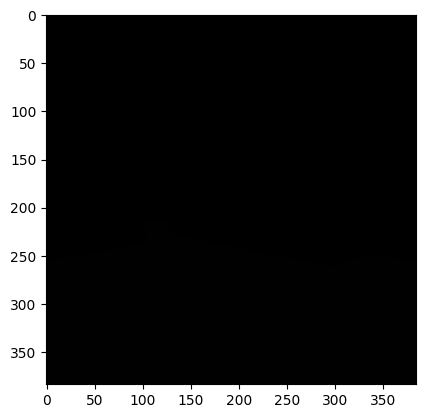

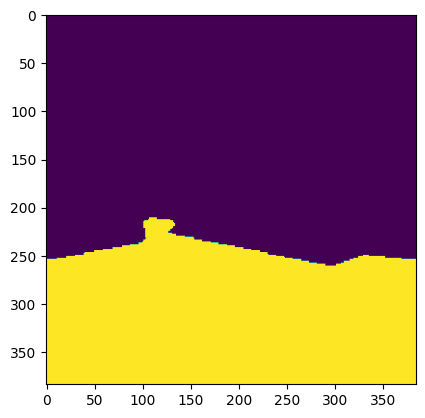

In [8]:
# Show a random training image and mask
import random
image_number = random.randint(0, len(X_train))
print(image_number)
print(X_train[image_number].shape)
print(Y_train[image_number].shape)
import matplotlib.pyplot as plt
plt.imshow(X_train[image_number])
plt.show()
plt.imshow(np.squeeze(Y_train[image_number]))
plt.show()


In [9]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 384, 384, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 384, 384, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [10]:
# Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
              tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
              tf.keras.callbacks.TensorBoard(log_dir='logs')]


results = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=16, epochs=25, callbacks=callbacks,)

Epoch 1/25


: 

In [ ]:
# #############################################
# idx = random.randint(0, len(X_train))

# preds_train = model.predict(X_train, verbose=1)
# preds_val = model.predict(X_valid, verbose=1)
# preds_test = model.predict(X_test, verbose=1)


# # Threshold predictions
# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)

# # Perform a sanity check on some random training samples
# ix = random.randint(0, len(preds_train_t))
# cv2.imshow("Image", X_train[ix])
# cv2.imshow("Mask", np.squeeze(Y_train[ix]))
# cv2.imshow("Predictions", np.squeeze(preds_train_t[ix]))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

2/2 [==============================] - 0s 228ms/step


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat data type = 0 is not supported
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'


: 

In [ ]:
# # Perform a sanity check on some random validation samples
# ix = random.randint(0, len(preds_val_t))
# cv2.imshow("Image", X_valid[ix])
# cv2.imshow("Mask", np.squeeze(Y_valid[ix]))
# cv2.imshow("Predictions", np.squeeze(preds_val_t[ix]))
# cv2.waitKey(0)
# cv2.destroyAllWindows()